# From Hollywood to Bollywood, an analysis of movie industries across time.

---

In [1]:
# Add local python scripts to path
import sys
sys.path.append('../src')
import load
import clean
import aggregate
import plot

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the data in dataframes

In [3]:
characters_raw = load.character_metadata()
movies_raw = load.movie_metadata()

In [4]:
ncountries_raw = aggregate.ncountries(movies_raw)
nmovies_raw = aggregate.nmovies(movies_raw)
ncharacters_raw = aggregate.ncharacters(characters_raw)
nactors_raw = aggregate.nactors(characters_raw)
print('Finished loading:')
print(f'- Number of countries:  {ncountries_raw}')
print(f'- Number of movies:     {nmovies_raw}')
print(f'- Number of characters: {ncharacters_raw}')
print(f'- Number of actors:     {nactors_raw}')

Finished loading:
- Number of countries:  147
- Number of movies:     81741
- Number of characters: 183435
- Number of actors:     135760


## 2. Clean up the data

### 2.1 Filtering countries of interest

To make comparisons between movies of different countries we assume that each movie comes from  a single country.
This is not always the case, we therefore drop all movies that come from multiple countries.

In [5]:
movies_unique = clean.filter_unique_countries(movies_raw)
nmovies_unique = aggregate.nmovies(movies_unique)
print(f'Dropped {nmovies_raw - nmovies_unique} movies coming from multiple countries, {nmovies_unique} movies remaining.')

Dropped 17372 movies coming from multiple countries, 64369 movies remaining.


We are only interested in the largest movie industries of the world (China, India, US, UK, Japan, France, South Korea). [SOURCE NEEDED]
To have meaningful comparisons we want to use enough movies from each of the country, let's say more than a 1000.

In [6]:
aggregate.top_countries_nmovies(movies_unique)

,Wikipedia_Movie_ID
Movie_Countries,
United States of America,30300
India,8240
United Kingdom,5343
Japan,2242
France,1853
Italy,1730
Canada,1342
Argentina,1266
Hong Kong,850


As we see above, we don't have enough movies for China and South Korea, this study will therefore only focus on US, India, UK, Japan and France.

In [7]:
countries_of_interest = ['United States of America', 'India', 'United Kingdom', 'Japan', 'France']
movies_filtered = clean.keep_countries(movies_unique, countries_of_interest)
nmovies_filtered = aggregate.nmovies(movies_filtered)
print(f'Dropped {nmovies_unique - nmovies_filtered} movies, {nmovies_filtered} movies remaining.')

Dropped 16391 movies, 47978 movies remaining.


Now we only keep the characters that come from these countries and add the country as a new column.

In [8]:
characters_filtered = clean.add_countries_to_characters(characters_raw, movies_filtered)
ncharacters_filtered = aggregate.ncharacters(characters_filtered)
print(f'Dropped {ncharacters_raw - ncharacters_filtered} characters, {ncharacters_filtered} characters remaining.')

Dropped 58005 characters, 125430 characters remaining.


As we can see the country of the movie of each character is now added as an extra column.

In [9]:
characters_filtered[['Character_Name', 'Movie_Countries']].head(5)

,Character_Name,Movie_Countries
0,Akooshay,United States of America
1,Lieutenant Melanie Ballard,United States of America
2,Desolation Williams,United States of America
3,Sgt Jericho Butler,United States of America
4,Bashira Kincaid,United States of America


Our cleaning is done, we see that while keeping 3% of the countries we keep around 60% of our original dataset.

In [10]:
movies = movies_filtered.reset_index().copy()
characters = characters_filtered.reset_index().copy()

ncountries = aggregate.ncountries(movies)
nmovies = aggregate.nmovies(movies)
ncharacters = aggregate.ncharacters(characters)
nactors = aggregate.nactors(characters)
print('Finished filtering countries of interest:')
print(f'- Number of countries:  {ncountries} ({ncountries / ncountries_raw:.1%})')
print(f'- Number of movies:     {nmovies} ({nmovies / nmovies_raw:.1%})')
print(f'- Number of characters: {ncharacters} ({ncharacters / ncharacters_raw:.1%})')
print(f'- Number of actors:     {nactors} ({nactors / nactors_raw:.1%})')

Finished filtering countries of interest:
- Number of countries:  5 (3.4%)
- Number of movies:     47978 (58.7%)
- Number of characters: 125430 (68.4%)
- Number of actors:     81896 (60.3%)


### 2.2 Filtering periods

We convert our columns corresponding to dates from string to datetime for easier manipulation and drop unspecified dates.

In [11]:
characters_parsed = clean.parse_dates(characters)
movies_parsed = clean.parse_dates(movies)

ncharacters_parsed = aggregate.ncharacters(characters_parsed)
nmovies_parsed = aggregate.nmovies(movies_parsed)

print(f'Dropped {ncharacters - ncharacters_parsed} characters, {ncharacters_parsed} characters remaining.')
print(f'Dropped {nmovies - nmovies_parsed} movies, {nmovies_parsed} movies remaining.')

Dropped 926 characters, 124504 characters remaining.
Dropped 2477 movies, 45501 movies remaining.


As a sanity check we make sure that the movie release dates are the same in the movies and characters tables.

In [12]:
ndifferences = clean.date_differences(movies_parsed, characters_parsed)
print(f'There are {ndifferences} differences between the movie and character dates.')

There are 0 differences between the movie and character dates.


We need a good representation of movies of each country over time.
We visualize the number of movies over time and the fraction from each country to select a representative time interval.

C:\Users\Tim\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\Tim\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:264: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  curves.iloc[:, cols] = (curves
C:\Users\Tim\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old b

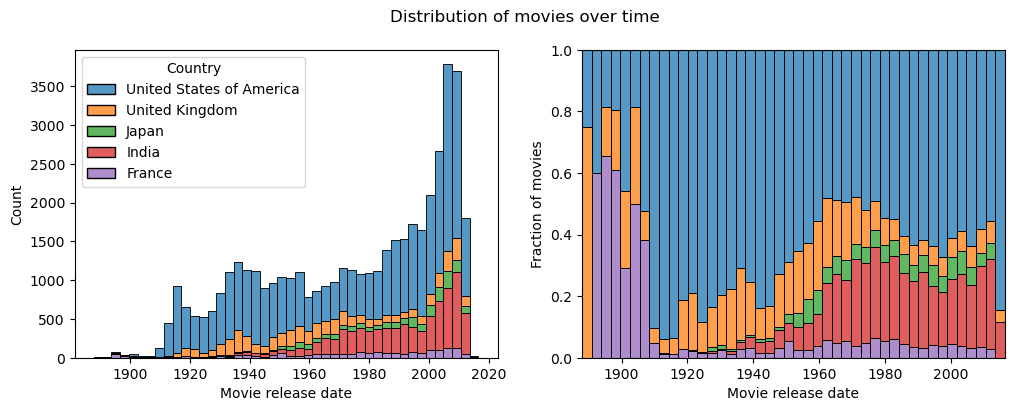

In [13]:
plot.movie_distribution_over_time(movies_parsed)

Based on this visualization we select movies from 1950 to 2013 for our analysis, and see that movies from each country are sufficiently represented.

C:\Users\Tim\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\Tim\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:264: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  curves.iloc[:, cols] = (curves
C:\Users\Tim\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old b

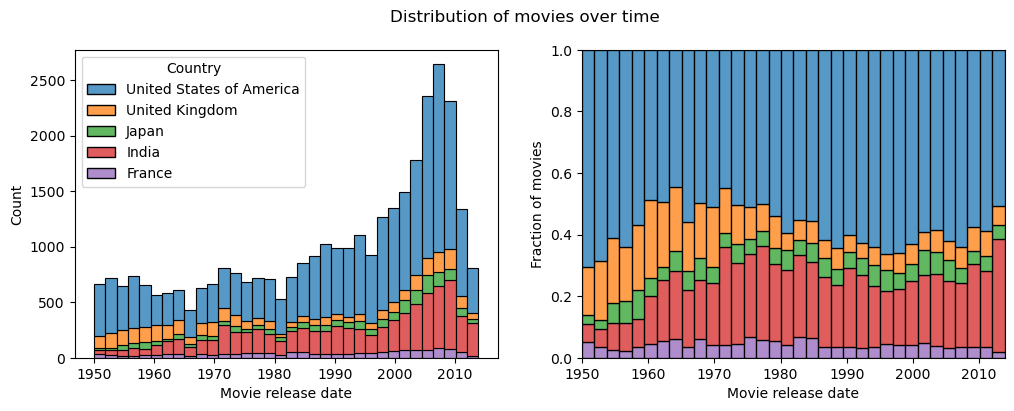

In [14]:
movies = clean.keep_dates(movies_parsed, 1950, 2013)
characters = clean.keep_dates(characters_parsed, 1950, 2013)
plot.movie_distribution_over_time(movies)

This leaves us with 40% of the original movies and 55% of the original characters.

In [15]:
ncountries = aggregate.ncountries(movies)
nmovies = aggregate.nmovies(movies)
ncharacters = aggregate.ncharacters(characters)
nactors = aggregate.nactors(characters)
print('Finished filtering countries of interest:')
print(f'- Number of countries:  {ncountries} ({ncountries / ncountries_raw:.1%})')
print(f'- Number of movies:     {nmovies} ({nmovies / nmovies_raw:.1%})')
print(f'- Number of characters: {ncharacters} ({ncharacters / ncharacters_raw:.1%})')
print(f'- Number of actors:     {nactors} ({nactors / nactors_raw:.1%})')

Finished filtering countries of interest:
- Number of countries:  5 (3.4%)
- Number of movies:     34008 (41.6%)
- Number of characters: 111207 (60.6%)
- Number of actors:     74133 (54.6%)


Add year and decade columns for convenient grouping.

In [16]:
clean.add_year_and_decade(movies)
clean.add_year_and_decade(characters)
movies.head(5)

,index,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Name,Movie_Release_Date,Revenue,Movie_Runtime,Movie_Languages,Movie_Countries,Movie_Genres,year,decade
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,Thriller,2001,2000
1,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,Science Fiction,2001,2000
2,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,Horror,2001,2000
3,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,Adventure,2001,2000
4,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,Supernatural,2001,2000


## (@Everyone before starting analysis)

Note that there can be multiple movie rows for the same movie ID, e.g. when there are multiple genres, so you have to filter!

In [17]:
# All the same movie
movies[['Wikipedia_Movie_ID', 'Movie_Name', 'Revenue', 'Movie_Countries', 'Movie_Genres']].head(5)

,Wikipedia_Movie_ID,Movie_Name,Revenue,Movie_Countries,Movie_Genres
0,975900,Ghosts of Mars,14010832.0,United States of America,Thriller
1,975900,Ghosts of Mars,14010832.0,United States of America,Science Fiction
2,975900,Ghosts of Mars,14010832.0,United States of America,Horror
3,975900,Ghosts of Mars,14010832.0,United States of America,Adventure
4,975900,Ghosts of Mars,14010832.0,United States of America,Supernatural


Example of filtering on your variable of interest (here movie revenue): 

In [18]:
revenues = movies[['Wikipedia_Movie_ID', 'Revenue', 'Movie_Countries']].drop_duplicates()
revenues.head(5)

,Wikipedia_Movie_ID,Revenue,Movie_Countries
0,975900,14010832.0,United States of America
7,3196793,NaN,United States of America
11,9363483,NaN,United Kingdom
27,2345652,NaN,United Kingdom
31,24229100,NaN,Japan


## 3. Analysis of different movie industries

General note: I think one thing we have to be careful of is that results will vary over time (as movie industries have changed over time).
Therefore, it might be smart to split movies into periods and compare the evolution for each country.
Did the movie industries diverge or converge?

### 3.1 Trends in movie industries

#### 3.1.1 Movie durations

Some cleaning to do, there are movies with durations of 1 minute and 1000000 minutes, have to check whether these make sense or are errors and filter them out:

In [19]:
runtimes = movies[['Wikipedia_Movie_ID', 'Movie_Runtime', 'Movie_Countries', 'decade']].drop_duplicates()
runtimes.Movie_Runtime.describe()

count    2.796500e+04
mean     1.380803e+02
std      6.453918e+03
min      1.000000e+00
25%      8.600000e+01
50%      9.500000e+01
75%      1.100000e+02
max      1.079281e+06
Name: Movie_Runtime, dtype: float64

Aside from the outliers, it seems that movies from all countries are relativaly the same length, except for indian movies who appear twice as long!
Over time duration from other countries seems to slightly increase while indian movies seem to decrease.

<AxesSubplot: xlabel='decade', ylabel='Movie_Runtime'>

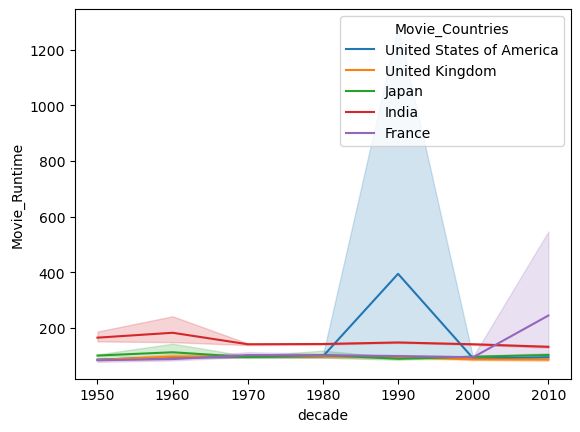

In [20]:
sns.lineplot(data=runtimes, x='decade', y='Movie_Runtime', hue='Movie_Countries')

#### 3.1.2 Movie revenue

Lots of movies with missing revenue.
We therefore need to find a reliable source to obtain these missing revenue and pull them in for better analysis.
Since we're doing this analysis over time, it would be interesting to adjust these revenue over inflation, for which we also need a reliable data source. (also have to decide whether we're taking global inflation rate or inflation rate per country)

In [21]:
missing_revenues = aggregate.nmovies(movies[movies.Revenue.isna()])
print(f"We have {missing_revenues/nmovies:.1%} movies with missing revenue")

We have 83.8% movies with missing revenue


Because of the missing revenue (especially for Indian and Japanese movies) the values are a little all over the place.

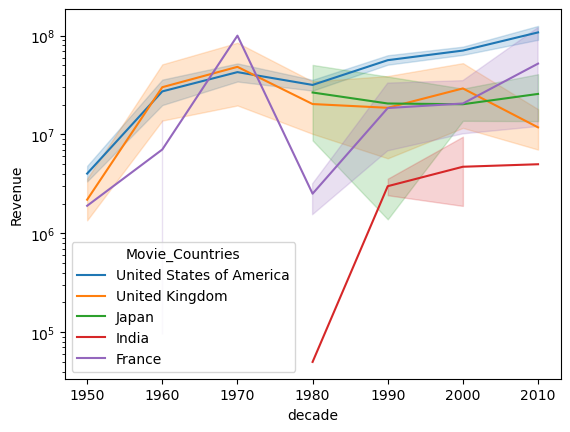

In [22]:
revenues = movies[['Wikipedia_Movie_ID', 'Revenue', 'Movie_Countries', 'decade']].drop_duplicates()
g = sns.lineplot(data=revenues, x='decade', y='Revenue', hue='Movie_Countries')
g.set_yscale('log')
plt.show()

#### 3.1.3 Budget

This should be the same analysis as revenue, but now for budget, a category that is completely missing from the original data.
We therefore need a reliable data source, adjust it for inflation, and then perform the analysis.

#### 3.1.4 Movie genres

This will need some creativity as I'm not sure if the below visualization is the best.
Perhaps comparing the fraction of a genre relative to other genres within a country (within each period) would be more appropriate.
More experimenting is needed here!

C:\Users\Tim\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='Count', ylabel='Movie_Genres'>

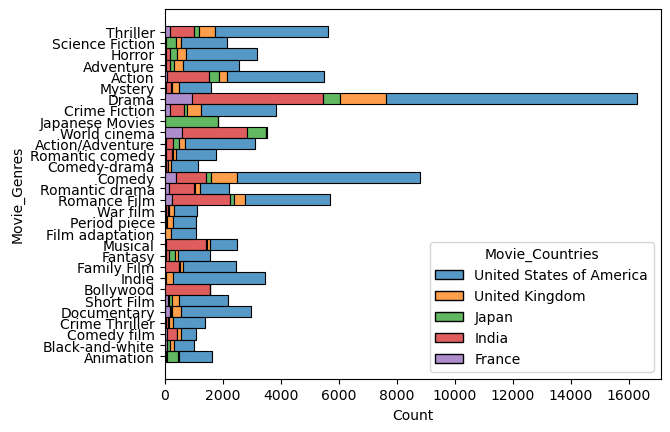

In [23]:
genres = movies[['Movie_Countries', 'Movie_Genres', 'decade']]
genres = genres.groupby(['Movie_Genres']).filter(lambda x: len(x) >= 1000)
sns.histplot(genres, y='Movie_Genres', hue='Movie_Countries', multiple='stack')

#### 3.1.5 NLP insights

I'm unfamiliar with what's feasible here, but perhaps we can have some insights from NLP processing of trends in different countries over time.

### 3.2 Diversity across industries

Possible metrics between countries:
- Age
- Gender ratio
- Ethnicity (although not much data, not sure if we can complete w/ other datasources)
- Actor height compared to national averages

This task should be similar to H1, just comparing populations using the appropriate statistic metrics.

Initial needed data wrangling:
- Age should be in the right range
- Gender ratio in an appropriate format for comparing
- Check if there is enough ethnicity data and if not try to obtain them from outside data source
- Obtain national heigh averages and compare them with appropriate methods

#### 3.2.1 Age

In [134]:
# assign to new variable
char_age = characters
characters.head()

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade
0,0,975900,United States of America,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,2000
1,1,975900,United States of America,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,2000
2,2,975900,United States of America,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,2000
3,3,975900,United States of America,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,2000
4,4,975900,United States of America,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,2000


In [135]:
char_age.describe()

,index,Wikipedia_Movie_ID,Actor_Height,Actor_Age_at_Movie_Release,year,decade
count,245207.000000,2.452070e+05,100825.000000,179121.000000,245207.000000,245207.000000
mean,148160.420233,1.266403e+07,1.769042,38.487319,1990.985453,1986.427427
std,85657.513265,1.056733e+07,2.885711,23.652003,17.483030,17.519729
min,0.000000,3.217000e+03,0.813000,-7896.000000,1950.000000,1950.000000
25%,73958.500000,3.077087e+06,1.680000,28.000000,1979.000000,1970.000000
50%,148033.000000,9.653698e+06,1.750000,37.000000,1996.000000,1990.000000
75%,222651.500000,2.170312e+07,1.830000,48.000000,2006.000000,2000.000000
max,296570.000000,3.750192e+07,510.000000,103.000000,2013.000000,2010.000000


There are still some inconsistencies in age which have to be filtered out. Data with negative age and NaN value will be removed.

In [136]:
# data with errors
char_age[char_age.Actor_Age_at_Movie_Release < 0].head()

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade
6948,6948,31163724,United States of America,/m/0gdk5td,1956-01-01,NaN,1973,M,NaN,NaN,Eric Chase Anderson,-17.0,/m/0gdljss,NaN,/m/026xg0t,1956,1950
8933,8933,21242801,United States of America,/m/05bzjwj,1955-08-07,NaN,1973-08-01,M,1.79,/m/03ttfc,Eduardo Noriega,-17.0,/m/0cg2f0f,NaN,/m/0bkkw0,1955,1950
13184,13184,20019382,United States of America,/m/04y9xhm,1977-09-28,El Raheem,2004-01-13,M,NaN,NaN,Don Blakely,-26.0,/m/0cgrzfq,/m/0cgrzft,/m/0bhh1hn,1977,1970
21795,21795,5261848,United States of America,/m/0dbfw4,1988-01-24,NaN,1992-10-19,NaN,NaN,NaN,Perry Allen,-4.0,/m/06mg50n,NaN,/m/06mg50r,1988,1980
23194,23194,11143228,India,/m/02r1gz2,1976-01-01,NaN,1982,F,NaN,NaN,Vijayalakshmi Agathiyan,-6.0,/m/0kn359c,NaN,/m/04gltqm,1976,1970


This is the data without missing/wrong data about the actor's age:

In [137]:
# clean dataframe
char_age[char_age.Actor_Age_at_Movie_Release > 0].dropna(subset='Actor_Age_at_Movie_Release')

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade
0,0,975900,United States of America,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,2000
1,1,975900,United States of America,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,2000
2,2,975900,United States of America,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,2000
3,3,975900,United States of America,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,2000
4,4,975900,United States of America,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296563,296563,913762,Japan,/m/03pcrp,1992-05-21,Lord Feff,1960-04-28,M,NaN,NaN,Steven Blum,32.0,/m/0kr408g,/m/0kr408l,/m/044_7j,1992,1990
296565,296565,913762,Japan,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz,1992,1990
296566,296566,913762,Japan,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992,1990
296567,296567,913762,Japan,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992,1990


For some characters age is missing but can be calculated with DOB and Release Date of the movie. Even in the Actor_DOB column exist inconsistencies, as the supposed actor was born in 1498 and took part in a movie almost 300 years later:

In [138]:
# characters with dob (date of birth) and mrd (movie release date) but not age at movie release
dob_mrd_char = char_age[char_age.Actor_Age_at_Movie_Release.isnull()].dropna(subset=['Actor_DOB', 'Movie_Release_Date'])
dob_mrd_char[pd.to_datetime(dob_mrd_char.Actor_DOB, format='%Y/%m/%d', errors='coerce').isnull()]

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade
2464,2464,21038272,India,/m/05b268g,1979-01-01,NaN,1498,F,NaN,NaN,Mirabai,NaN,/m/05cnn3x,NaN,/m/03h165,1979,1970
121161,121161,20072112,United States of America,/m/04n46f5,2008-01-01,NaN,1075-08-19,F,NaN,NaN,Holly Eglington,NaN,/m/0gc7_rh,NaN,/m/0gc64t0,2008,2000


In [139]:
# drop these rows
remove_idx = dob_mrd_char[pd.to_datetime(dob_mrd_char.Actor_DOB, format='%Y/%m/%d', errors='coerce').isnull()].index
char_age = char_age.drop(labels=remove_idx, axis=0)
char_age

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade
0,0,975900,United States of America,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,2000
1,1,975900,United States of America,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,2000
2,2,975900,United States of America,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,2000
3,3,975900,United States of America,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,2000
4,4,975900,United States of America,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296566,296566,913762,Japan,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992,1990
296567,296567,913762,Japan,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992,1990
296568,296568,913762,Japan,/m/03pcrp,1992-05-21,Exegran,NaN,M,NaN,NaN,Hal Cleaveland,NaN,/m/0kr407c,/m/0kr406_,/m/0kr407h,1992,1990
296569,296569,913762,Japan,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992,1990


In [140]:
# convert into date format to extract year
dob_mrd_char.Actor_DOB = pd.to_datetime(dob_mrd_char.Actor_DOB, format='%Y/%m/%d', errors='coerce')
dob_mrd_char.Movie_Release_Date = pd.to_datetime(dob_mrd_char.Movie_Release_Date, format='%Y/%m/%d', errors='coerce')
dob_mrd_char

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade
85,85,77856,United States of America,/m/0kcn7,1964-08-27,The Constable,1894-07-23 00:00:00,M,NaN,NaN,Arthur Treacher,NaN,/m/0cg2t2_,/m/0h5njw9,/m/020csj,1964,1960
87,87,77856,United States of America,/m/0kcn7,1964-08-27,Uncle Albert,1886-11-09 00:00:00,M,1.8200,NaN,Ed Wynn,NaN,/m/05nn480,/m/05ysxy5,/m/01k67w,1964,1960
91,91,77856,United States of America,/m/0kcn7,1964-08-27,Admiral Boom,1887-08-05 00:00:00,M,NaN,NaN,Reginald Owen,NaN,/m/0csl6kq,/m/0h5njw2,/m/0b47ns,1964,1960
280,280,5915856,India,/m/0fdc85,2003-10-01,NaN,1970-09-09 00:00:00,M,NaN,NaN,Biju Menon,NaN,/m/0j_1kz,NaN,/m/0g9d5d,2003,2000
281,281,5915856,India,/m/0fdc85,2003-10-01,NaN,1965-12-10 00:00:00,M,NaN,NaN,Jayaram,NaN,/m/0j_1kn,NaN,/m/075p0r,2003,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296120,296120,25431214,India,/m/09k5h57,2009-12-01,Mathews,1960-05-21 00:00:00,M,1.7200,/m/0dryh9k,Mohanlal,NaN,/m/0gvzwgy,/m/0h1j8l9,/m/02fbpz,2009,2000
296121,296121,25431214,India,/m/09k5h57,2009-12-01,Adv. Sunitha,1989-05-05 00:00:00,F,1.7018,/m/074w_m,Lakshmi Rai,NaN,/m/0gvz_3b,/m/0h34ydz,/m/02pnknk,2009,2000
296122,296122,25431214,India,/m/09k5h57,2009-12-01,Adv. Prabalan,1956-04-06 00:00:00,M,NaN,/m/046cwm,Sreenivasan,NaN,/m/0hh977l,/m/0hh977p,/m/05gc0h,2009,2000
296123,296123,25431214,India,/m/09k5h57,2009-12-01,NaN,1985-06-30 00:00:00,F,NaN,NaN,Priyanka Nair,NaN,/m/0n9_2kr,NaN,/m/0czbskd,2009,2000


The age of the actors are based on the year of birth and year of movie release as the data does not provide a consistent format including day and month dates for all subjects.

In [141]:
def calc_age(df1, df2):
    """
    Calculates the age of the actor
    """
    return df1.year - df2.year

In [142]:
# replace the actors' calculated ages and remove the wrong data
dob_mrd_char.Actor_Age_at_Movie_Release = dob_mrd_char.apply(lambda x: calc_age(x.Movie_Release_Date, x.Actor_DOB), axis=1)
dob_mrd_char = dob_mrd_char.drop(labels=remove_idx, axis=0)

In [143]:
# replace NaN with calculated age in original dataframe
char_age.Actor_Age_at_Movie_Release.loc[dob_mrd_char.index] = dob_mrd_char.Actor_Age_at_Movie_Release

C:\Users\Tim\AppData\Local\Temp\ipykernel_20420\1898141241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_age.Actor_Age_at_Movie_Release.loc[dob_mrd_char.index] = dob_mrd_char.Actor_Age_at_Movie_Release


In [144]:
# cleansed data
char_age = char_age[char_age.Actor_Age_at_Movie_Release > 0].dropna(subset='Actor_Age_at_Movie_Release')
char_age

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade
0,0,975900,United States of America,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,2000
1,1,975900,United States of America,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,2000
2,2,975900,United States of America,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,2000
3,3,975900,United States of America,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,2000
4,4,975900,United States of America,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296565,296565,913762,Japan,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz,1992,1990
296566,296566,913762,Japan,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992,1990
296567,296567,913762,Japan,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992,1990
296569,296569,913762,Japan,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,22.0,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992,1990


There are still some outliers as some movies include retrospectives on older movies with the same character (especially animation movies). This data is not representative for our analysis and will be filtered out as well. According to Roser et al. the life expectancy in the chosen countries was around 80 years in 2005. We will therefore set a threshold at 90 years to account for the increase in life expectancy with improved healthcare and some possible outliers.

Source: https://ourworldindata.org/life-expectancy#:~:text=The%20term%20%E2%80%9Clife%20expectancy%E2%80%9D%20refers,will%20be%20when%20they%20die.

<AxesSubplot: title={'center': 'Actor_Age_at_Movie_Release'}, xlabel='Movie_Countries'>

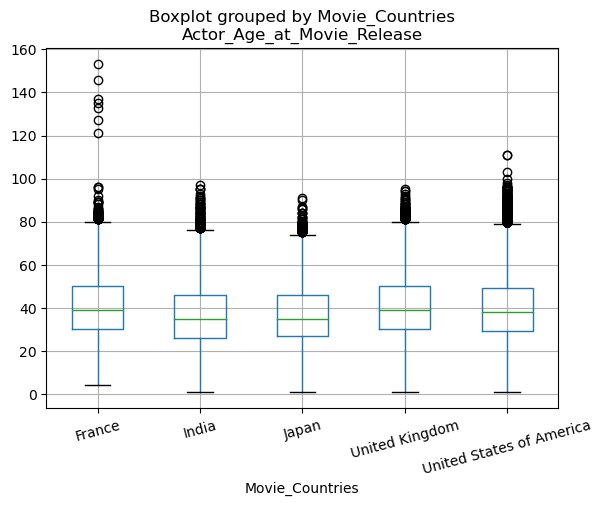

In [145]:
# plot data to check for further inconsistencies
char_age.boxplot(by='Movie_Countries', column='Actor_Age_at_Movie_Release', rot=15)

In [146]:
# filter out errors
char_age = char_age[char_age.Actor_Age_at_Movie_Release < 90]

For 25.7 % of the given actors we can analyze the age distribution:

In [147]:
ncharacters_age = aggregate.ncharacters(char_age)
nactors_age = aggregate.nactors(char_age)
print(f'- Number of characters: {ncharacters_age} ({ncharacters_age / ncharacters_raw:.1%})')
print(f'- Number of actors:     {nactors_age} ({nactors_age / nactors_raw:.1%})')

- Number of characters: 87807 (47.9%)
- Number of actors:     34892 (25.7%)


In average over all the years from 1950 to 2013 the statistics in the Big 5 countries is very similar. Most of the actors were between 26 and 50 years old.

In [148]:
# compare countries' statistic
char_age.groupby('Movie_Countries').Actor_Age_at_Movie_Release.describe()

,count,mean,std,min,25%,50%,75%,max
Movie_Countries,,,,,,,,
France,4864.0,40.847656,14.795182,4.0,30.0,39.0,50.0,89.0
India,31522.0,36.720989,13.295800,1.0,26.0,35.0,46.0,89.0
Japan,7961.0,37.127371,13.671876,1.0,27.0,35.0,46.0,87.0
United Kingdom,17675.0,40.377595,13.910450,1.0,30.0,39.0,50.0,89.0
United States of America,127262.0,39.379178,14.686246,1.0,29.0,38.0,49.0,89.0


<AxesSubplot: title={'center': 'Actor_Age_at_Movie_Release'}, xlabel='Movie_Countries'>

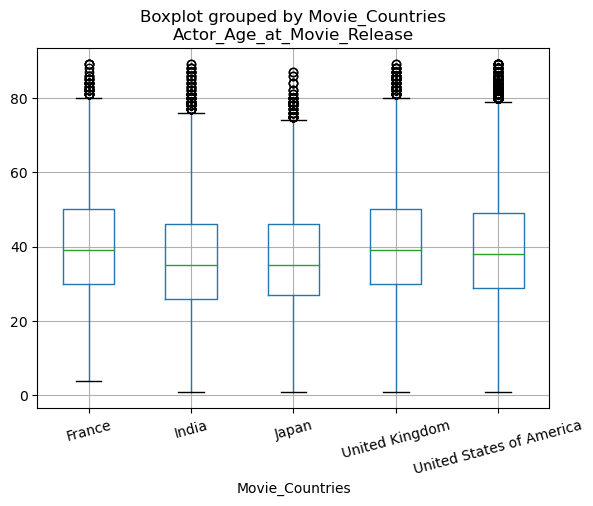

In [149]:
# plot new dataframe
char_age.boxplot(by='Movie_Countries', column='Actor_Age_at_Movie_Release', rot=15)

Whereas in the 50's the USA, UK and France had a similar age of movie actors (~ 39 years), Japan and India had younger actors. With a rather strong decline in the 60's in France, France and Japan show a trend towards older actors in movies. In general the range of actors' ages is low in the USA and UK compared to the other three countries.

C:\Users\Tim\AppData\Local\Temp\ipykernel_20420\1556813850.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=char_age, x="decade", y="Actor_Age_at_Movie_Release", hue="Movie_Countries", ci=95)


<AxesSubplot: xlabel='decade', ylabel='Actor_Age_at_Movie_Release'>

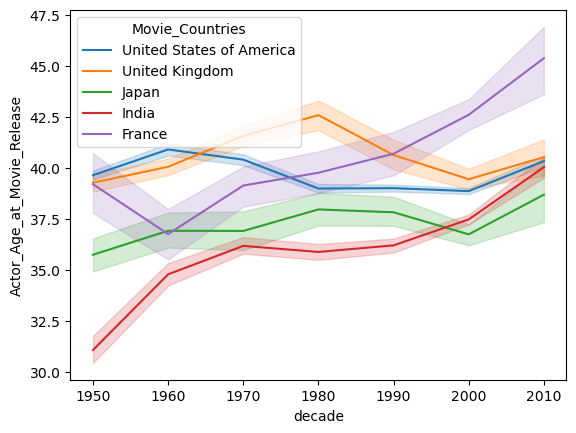

In [150]:
# compare over decades
# CI of 95 % was added
sns.lineplot(data=char_age, x="decade", y="Actor_Age_at_Movie_Release", hue="Movie_Countries", ci=95)

#### 3.2.2 Gender

In [151]:
# assign to new variable
char_gender = characters

In [152]:
no_nan_gender = len(char_gender[char_gender.Actor_Gender.isna()])
print(f"There are {no_nan_gender} NaN values for the gender of actors.")

There are 21395 NaN values for the gender of actors.


In [153]:
# drop missing data
char_gender = char_gender.dropna(subset='Actor_Gender')

For 41.1 % of the given actors we can analyze the gender ratio:

In [154]:
ncharacters_gender = aggregate.ncharacters(char_gender)
nactors_gender = aggregate.nactors(char_gender)
print(f'- Number of characters: {ncharacters_gender} ({ncharacters_gender / ncharacters_raw:.1%})')
print(f'- Number of actors:     {nactors_gender} ({nactors_gender / nactors_raw:.1%})')

- Number of characters: 107876 (58.8%)
- Number of actors:     55770 (41.1%)


In general the number of female actors in movies was much less than the number of male actors. Is the movie industry really male dominated or did it change over time?

In [155]:
# compare male and female in different countries
char_gender.groupby(['Actor_Gender', 'Movie_Countries'])['Actor_Gender'].count()

Actor_Gender  Movie_Countries         
F             France                       2391
              India                       14411
              Japan                        3385
              United Kingdom               6254
              United States of America    48165
M             France                       3746
              India                       27816
              Japan                        5514
              United Kingdom              13469
              United States of America    98661
Name: Actor_Gender, dtype: int64

[Text(0, 0, 'United States of America'),
 Text(1, 0, 'United Kingdom'),
 Text(2, 0, 'Japan'),
 Text(3, 0, 'India'),
 Text(4, 0, 'France')]

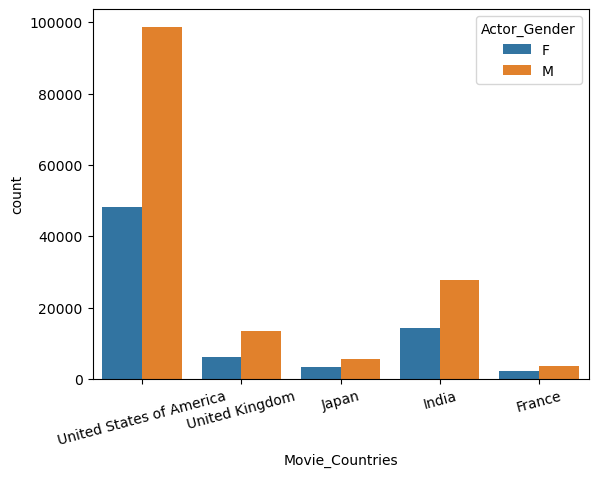

In [156]:
# plot data
gender_plot = sns.countplot(data=char_gender, x='Movie_Countries', hue='Actor_Gender')
gender_plot.set_xticklabels(gender_plot.get_xticklabels(), rotation=15)

In [157]:
# split the data into two columns and creating indicator variables for Male and Female
char_gender = pd.get_dummies(char_gender, columns=['Actor_Gender'])
char_gender.head()

,index,Wikipedia_Movie_ID,Movie_Countries,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Char_Actor_Map_ID,Freebase_Char_ID,Freebase_Actor_ID,year,decade,Actor_Gender_F,Actor_Gender_M
0,0,975900,United States of America,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,2000,1,0
1,1,975900,United States of America,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,2000,1,0
2,2,975900,United States of America,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,2000,0,1
3,3,975900,United States of America,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,2000,0,1
4,4,975900,United States of America,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,2000,1,0


In [158]:
# calculate male/female ratio for decades
grouped_gender = char_gender.groupby(['decade', 'Movie_Countries'])
gender_ratio = grouped_gender['Actor_Gender_F']\
    .sum().div(grouped_gender['Actor_Gender_M'].sum())

In [159]:
# create new dataframe
df_gender_ratio = pd.DataFrame(gender_ratio, columns=['Ratio F/M'])

Except for India there is a trend towards more actresses in movies. Only India shows a trend towards more male actors. However, India had the highest ratio in the 50's. In none of the countries were as many male as female actors in 2013.

<AxesSubplot: xlabel='decade', ylabel='Ratio F/M'>

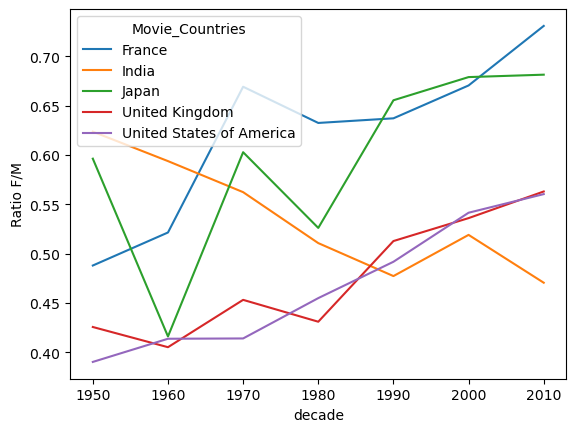

In [160]:
# plot new dataframe
sns.lineplot(data=df_gender_ratio, x='decade', y='Ratio F/M', hue='Movie_Countries')

We will now compare the age between male and female actors in the different countries.
In average female actors are much younger (33.82 +/- 13.9) than male actors (41.55 +/- 13.94).

In [161]:
# use gender as additional information
age_gender = pd.get_dummies(char_age, columns=['Actor_Gender'])

In [166]:
# assign data to male/female
female_age = age_gender[age_gender.Actor_Gender_F == 1]
male_age = age_gender[age_gender.Actor_Gender_M == 1]

In [167]:
female_age.Actor_Age_at_Movie_Release.describe()

count    62511.000000
mean        33.823807
std         13.901891
min          1.000000
25%         24.000000
50%         31.000000
75%         41.000000
max         89.000000
Name: Actor_Age_at_Movie_Release, dtype: float64

In [168]:
male_age.Actor_Age_at_Movie_Release.describe()

count    125823.000000
mean         41.546490
std          13.937652
min           1.000000
25%          31.000000
50%          40.000000
75%          51.000000
max          89.000000
Name: Actor_Age_at_Movie_Release, dtype: float64

France has in average the oldest actresses whereas India has the youngest. The male actors are in every country around the same age.

In [169]:
female_age.groupby('Movie_Countries')['Actor_Age_at_Movie_Release'].describe()

,count,mean,std,min,25%,50%,75%,max
Movie_Countries,,,,,,,,
France,1890.0,36.614815,14.913436,5.0,26.0,33.0,44.0,89.0
India,11184.0,28.854793,11.361938,1.0,22.0,26.0,33.0,89.0
Japan,2969.0,31.818121,12.759857,1.0,23.0,29.0,38.0,86.0
United Kingdom,5440.0,35.981066,14.458219,2.0,25.0,32.0,44.0,89.0
United States of America,41028.0,34.908867,14.155075,1.0,25.0,32.0,42.0,89.0


In [170]:
male_age.groupby('Movie_Countries')['Actor_Age_at_Movie_Release'].describe()

,count,mean,std,min,25%,50%,75%,max
Movie_Countries,,,,,,,,
France,2937.0,43.556691,14.037038,4.0,33.0,42.0,53.0,89.0
India,20291.0,41.051550,12.254879,1.0,32.0,40.0,49.0,89.0
Japan,4916.0,40.414565,13.168855,3.0,31.0,39.0,49.0,87.0
United Kingdom,12141.0,42.328391,13.169950,1.0,33.0,41.0,51.0,89.0
United States of America,85538.0,41.548949,14.436784,1.0,31.0,40.0,51.0,89.0


C:\Users\Tim\AppData\Local\Temp\ipykernel_20420\1943014117.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=female_age, x="decade", y="Actor_Age_at_Movie_Release", hue="Movie_Countries", ci=95)


<AxesSubplot: xlabel='decade', ylabel='Actor_Age_at_Movie_Release'>

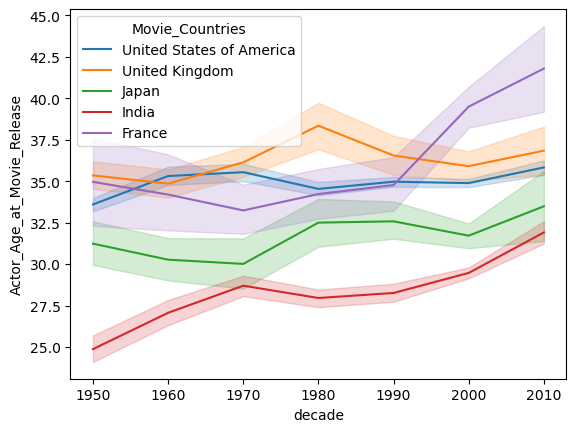

In [104]:
# Age of women in movie industry in different countries
# CI of 95 % was added
sns.lineplot(data=female_age, x="decade", y="Actor_Age_at_Movie_Release", hue="Movie_Countries", ci=95)

C:\Users\Tim\AppData\Local\Temp\ipykernel_20420\549434717.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=male_age, x="decade", y="Actor_Age_at_Movie_Release", hue="Movie_Countries", ci=95)


<AxesSubplot: xlabel='decade', ylabel='Actor_Age_at_Movie_Release'>

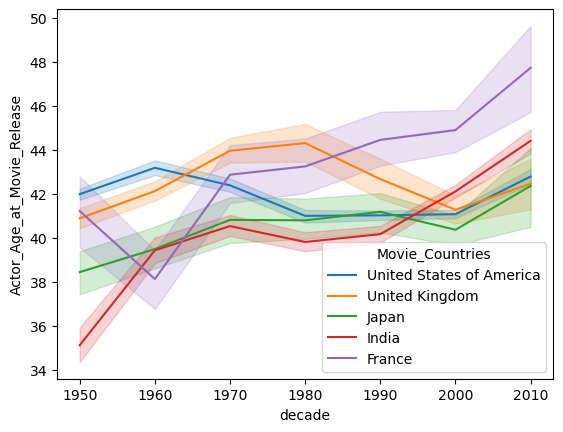

In [105]:
# Age of men in movie industry in different countries
# CI of 95 % was added
sns.lineplot(data=male_age, x="decade", y="Actor_Age_at_Movie_Release", hue="Movie_Countries", ci=95)

#### 3.2.3 Ethnicity

In [59]:
# assign new variable
char_ethnicity = characters

In [60]:
no_nan_ethnicity = len(char_ethnicity[char_ethnicity.Actor_Ethnicity.isna()])
print(f"There are {no_nan_ethnicity} NaN values for the ethnicity of actors.")

There are 173766 NaN values for the ethnicity of actors.


In [61]:
# drop rows with missing values
char_ethnicity = char_ethnicity.dropna(subset='Actor_Ethnicity')

For 5 % of the given actors we can analyze the ethnicity:

In [62]:
ncharacters_ethn = aggregate.ncharacters(char_ethnicity)
nactors_ethn = aggregate.nactors(char_ethnicity)
print(f'- Number of characters: {ncharacters_ethn} ({ncharacters_ethn / ncharacters_raw:.1%})')
print(f'- Number of actors:     {nactors_ethn} ({nactors_ethn / nactors_raw:.1%})')

- Number of characters: 42943 (23.4%)
- Number of actors:     6777 (5.0%)


Since there are so many different ethnicities with not much data, we try to measure the diversity by how many different ethnicities a country's movie industry has.

In [214]:
unique_ethn = len(char_ethnicity.Actor_Ethnicity.unique())
print(f'There are {unique_ethn} different ethnicities in the dataset.')

There are 418 different ethnicities in the dataset.


In [219]:
char_ethnicity.groupby(['Movie_Countries', 'decade']).Actor_Ethnicity.unique()

Movie_Countries           decade
France                    1950      [/m/041rx, /m/0fj1k9, /m/03ttfc, /m/03ts0c, /m...
                          1960      [/m/041rx, /m/022fdt, /m/03ts0c, /m/02w7gg, /m...
                          1970      [/m/02ctzb, /m/03ts0c, /m/041rx, /m/0bkbz, /m/...
                          1980      [/m/03ts0c, /m/041rx, /m/013xrm, /m/06v41q, /m...
                          1990      [/m/03ts0c, /m/02ctzb, /m/04mmhj, /m/0466nw8, ...
                          2000      [/m/0x67, /m/01flqq, /m/03ts0c, /m/02w7gg, /m/...
                          2010      [/m/03ts0c, /m/03bkbh, /m/07mqps, /m/09vmyh, /...
India                     1950      [/m/0dryh9k, /m/04zjjt, /m/0g0x7_, /m/01rv7x, ...
                          1960      [/m/0dryh9k, /m/02y_9mh, /m/0g0x7_, /m/04nrnz,...
                          1970      [/m/0dryh9k, /m/04jq32s, /m/0fqp6zk, /m/0g0x7_...
                          1980      [/m/0dryh9k, /m/048sp5, /m/04mvp8, /m/0cqgdq, ...
                     

[Text(0, 0, 'United States of America'),
 Text(1, 0, 'United Kingdom'),
 Text(2, 0, 'India'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'France')]

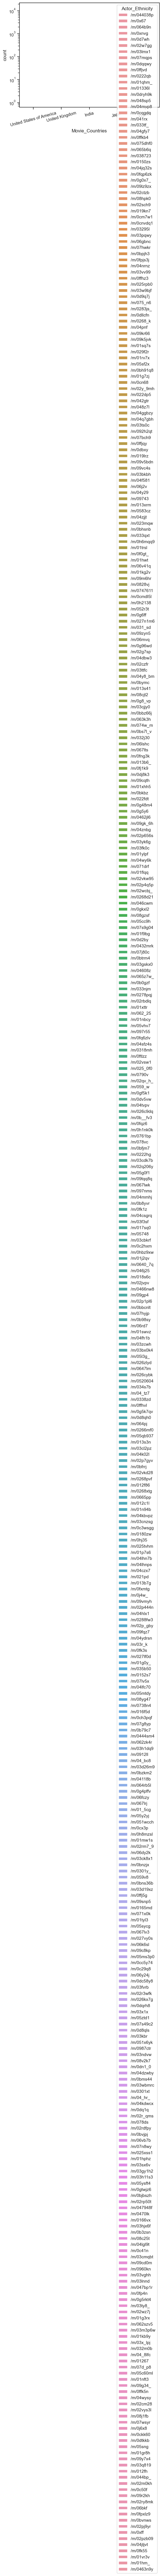

In [208]:
ethn_plot = sns.countplot(data=char_ethnicity, x='Movie_Countries', hue='Actor_Ethnicity', log=True)
ethn_plot.set_xticklabels(ethn_plot.get_xticklabels(), rotation=15)

#### 3.2.4 Height

In [65]:
# assign to new variable
char_height = characters

In [66]:
no_nan_height = len(char_height[char_height.Actor_Height.isna()])
print(f"There are {no_nan_height} NaN values for the height of actors.")

There are 144382 NaN values for the height of actors.


In [67]:
# drop rows with missing values
char_height = char_height.dropna(subset='Actor_Height')

The maximum height of 510 m is impossible, therefore, there exist inconsistent data about the actor's height. The tallest person was 2.72 m. Therefore, we will filter out every actor above that height.

Source: https://en.wikipedia.org/wiki/Robert_Wadlow

In [68]:
# check statistics for inconsistencies
char_height.Actor_Height.describe()

count    100825.000000
mean          1.769042
std           2.885711
min           0.813000
25%           1.680000
50%           1.750000
75%           1.830000
max         510.000000
Name: Actor_Height, dtype: float64

In [78]:
# filter data
char_height = char_height[char_height.Actor_Height < 2.72]

For 8.1 % of the given actors we can analyze the height:

In [79]:
ncharacters_height = aggregate.ncharacters(char_height)
nactors_height = aggregate.nactors(char_height)
print(f'- Number of characters: {ncharacters_height} ({ncharacters_height / ncharacters_raw:.1%})')
print(f'- Number of actors:     {nactors_height} ({nactors_height / nactors_raw:.1%})')

- Number of characters: 56941 (31.0%)
- Number of actors:     10975 (8.1%)


<AxesSubplot: title={'center': 'Actor_Height'}, xlabel='Movie_Countries'>

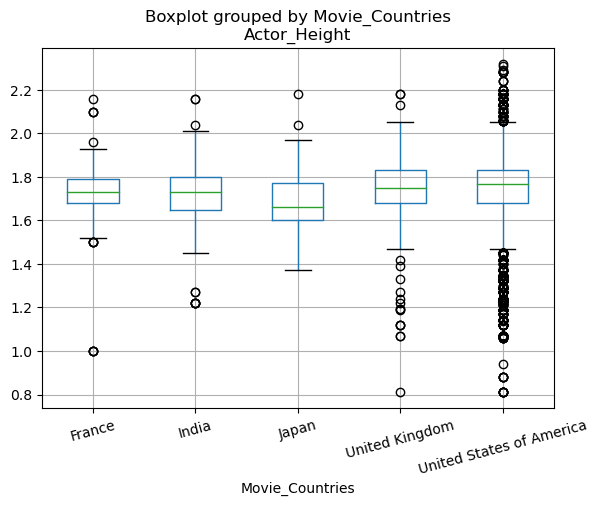

In [80]:
# plot data
char_height.boxplot(by='Movie_Countries', column='Actor_Height', rot=15)

C:\Users\Tim\AppData\Local\Temp\ipykernel_20420\982395820.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=char_height, x="decade", y="Actor_Height", hue="Movie_Countries", ci=95)


<AxesSubplot: xlabel='decade', ylabel='Actor_Height'>

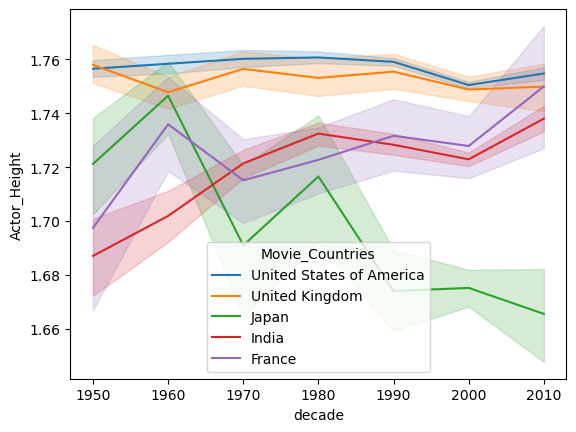

In [82]:
# check height over decades
# CI of 95 % was added
sns.lineplot(data=char_height, x="decade", y="Actor_Height", hue="Movie_Countries", ci=95)

As women are generally less tall than men, we will split the data into male and female.

In [175]:
# use gender as additional information
height_gender = pd.get_dummies(char_height, columns=['Actor_Gender'])

In [176]:
# assign data to male/female
female_height = height_gender[height_gender.Actor_Gender_F == 1]
male_height = height_gender[height_gender.Actor_Gender_M == 1]

To check for discrimination we need to compare the smallest and tallest persons during the decades. The average value does not give much information about that.

In [177]:
female_height.Actor_Height.describe()

count    36376.000000
mean         1.661554
std          0.068711
min          1.060000
25%          1.620000
50%          1.660000
75%          1.702000
max          2.010000
Name: Actor_Height, dtype: float64

In [178]:
male_height.Actor_Height.describe()

count    64349.000000
mean         1.800644
std          0.088822
min          0.813000
25%          1.750000
50%          1.800000
75%          1.850000
max          2.316480
Name: Actor_Height, dtype: float64

In [206]:
# get the min and max values
min_male_h = male_height.groupby(['Movie_Countries', 'decade']).min(numeric_only=True)
max_male_h = male_height.groupby(['Movie_Countries', 'decade']).max(numeric_only=True)
min_female_h = female_height.groupby(['Movie_Countries', 'decade']).min(numeric_only=True)
max_female_h = female_height.groupby(['Movie_Countries', 'decade']).max(numeric_only=True)

The UK and the USA had both very tall and short male actors over the time of 1950-2013. France and India started including very short male actors from the 2000's. Tall people were always part of movies, however, short men were not included in Japan. Short-grown women were not part of movies until the 80's.

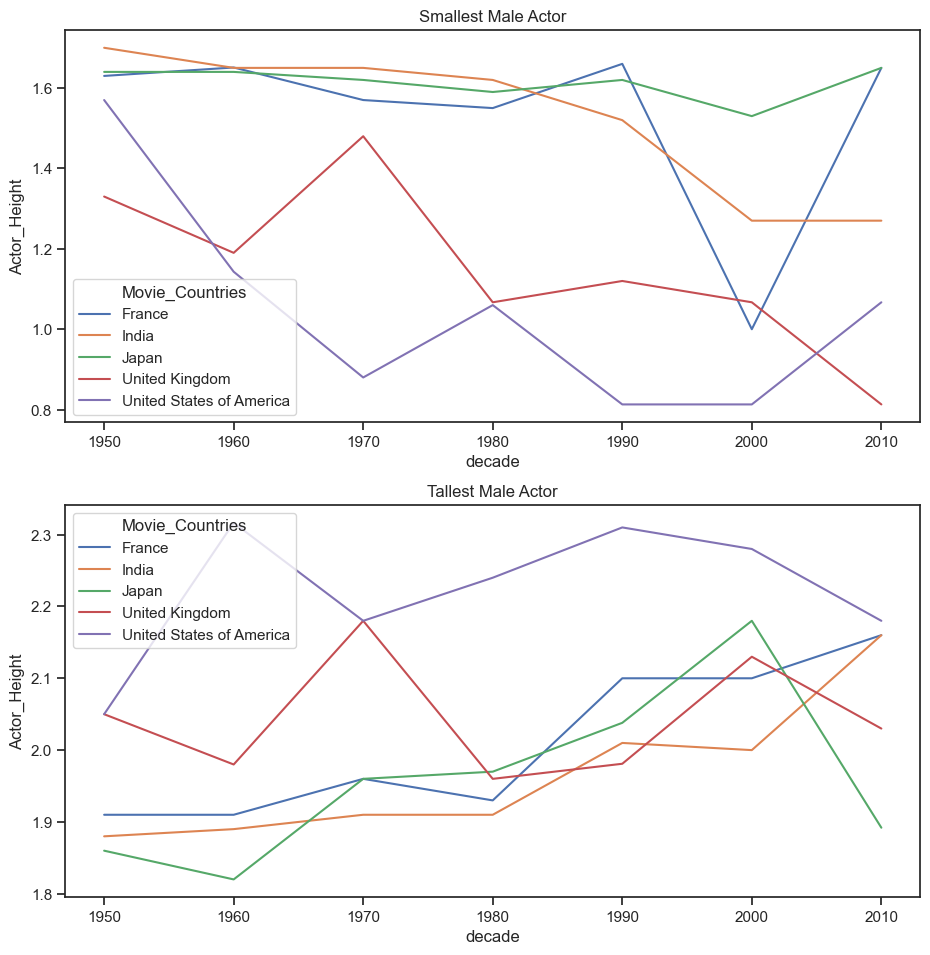

In [205]:
# check male height over decades
fig, ax = plt.subplots(2, figsize=(10,10))
plt.tight_layout(pad=3)
sns.set(style="ticks")
ax[0].set_title('Smallest Male Actor')
ax[1].set_title('Tallest Male Actor')
sns.lineplot(data=min_male_h, x="decade", y="Actor_Height", hue="Movie_Countries", ax=ax[0])
sns.lineplot(data=max_male_h, x="decade", y="Actor_Height", hue="Movie_Countries", ax=ax[1])
plt.show()

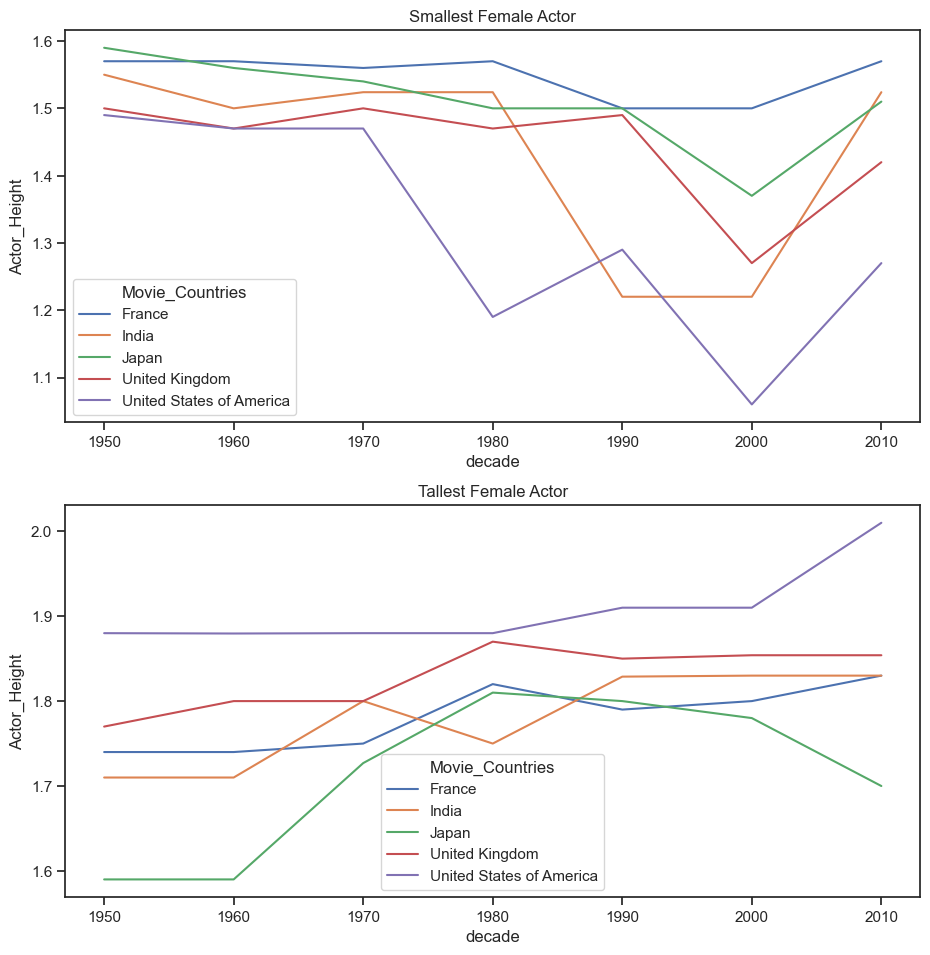

In [207]:
# check female height over decades
fig, ax = plt.subplots(2, figsize=(10,10))
plt.tight_layout(pad=3)
sns.set(style="ticks")
ax[0].set_title('Smallest Female Actor')
ax[1].set_title('Tallest Female Actor')
sns.lineplot(data=min_female_h, x="decade", y="Actor_Height", hue="Movie_Countries", ax=ax[0])
sns.lineplot(data=max_female_h, x="decade", y="Actor_Height", hue="Movie_Countries", ax=ax[1])
plt.show()

### 3.3 Success across industries

Our intial question, but now more precisely comparing across different countries.
What factors predict the success of a movie (financial and rating), and do they differ across the different countries?